<div style="background-color:#2E87A4 ;color:#FDFDFD;padding:20px;border:1px solid #3184BB;text-align:center;">
<p><font size="14" color="#FDFDFD" face="Lora"><i>Medical Insurance Case_Study</i></font> </p>
</div>

## <div style="padding: 20px;color:white;margin:10;font-size:111%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/579216/pexels-photo-579216.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'>Medical Impact On Your Wallet</span></b> </div>

> We now came into a future where `Health` is one of the most important aspect of our lives. This `Health` can have significant impact on financial status of person. Today we will be looking into historical data of Patient Medical Insurance cost given his diagnosis and aspects such as `BMI`, `Smoker`, `age`, `Age`,`Children`, `Region`, `Charges` which have significance impact on his medical cost.

### Problem-Statement
> **Our aim here is to build a Machine Learning Model that can accuratly `predict the Medical Insurance Cost` of an Given Individual**

**You can use the following flow as a template to solve any supervised ML Regression problem!**

### The flow of the case study is as below:

* Reading the data in python
* Defining the problem statement
* Identifying the Target variable
* Looking at the distribution of Target variable
* Basic Data exploration
* Rejecting useless columns
* Visual Exploratory Data Analysis for data distribution (Histogram and Barcharts)
* Feature Selection based on data distribution
* Outlier treatment
* Missing Values treatment
* Visual correlation analysis
* Statistical correlation analysis (Feature Selection)
* Converting data to numeric for ML
* Sampling and K-fold cross validation
* Trying multiple Regression algorithms
* Selecting the best Model
* Deploying the best model in production

### <b><span style='color:#846c5b'>|</span> DATA DICTIONARY</b>
<br>

1. **`Age`**: Age is a significant factor in health insurance as older individuals are generally at a higher risk of health issues compared to younger individuals.

2. **`Sex`**: Gender can play a role in health insurance costs. Some studies suggest that women tend to use more health care services, especially during childbearing years.`Male` and `Female` are the categories.

3. **`BMI (Body Mass Index)`**: BMI(Body Mass Index) is a measure that attempts to quantify an individual's tissue mass. High BMI values are often associated with higher risk of chronic diseases like heart disease, diabetes, and certain types of cancer, which can lead to higher health care costs.

4. **`Children`**: The number of dependents a person has can influence health insurance costs. More dependents usually mean higher insurance charges because more individuals are covered under the same plan.

5. **`Smoker`**: Smoking is a significant risk factor for many health conditions, including heart disease, stroke, and cancer. Smokers often face higher health insurance charges due to these increased health risks.

6. **`Region`**: The region where the beneficiary lives can also affect health insurance charges. This could be due to variations in  Geography, climatic conditions, health care costs.

7. **`Charges`**: This is the individual medical costs billed by health insurance. It's the dependent variable in this dataset, and it's influenced by all the other factors. Understanding the relationships between the independent variables (age, sex, bmi, children, smoker, region) and charges is the main goal of this analysis.

### Reading the data into python
* This is one of the most important steps in machine learning! You must understand the data and the domain well before trying to apply any machine learning algorithm.
**The dataset file contains 1337 records of patients**

#### Data Source:
* source: https://www.kaggle.com/datasets/mirichoi0218/insurance

In [31]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

## Optimization - instructing to excuate every expression without a print statement
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = 'all'

## Analysis
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

# for Hd Visualizations
%config InlineBackend.figure_format='retina'

In [2]:
# Reading the Data
data = pd.read_csv(r"C:\Users\RAGUWING\Desktop\Resume\Additional Documents\Medical Insurance Dataset\insurance.csv")
print('shape Before dropping duplicates: ', data.shape)
# Removing the duplicates if present any
data = data.drop_duplicates()
print('shape After deleting duplicates: ', data.shape) # shape after duplicates are deleted

shape Before dropping duplicates:  (1338, 7)
shape After deleting duplicates:  (1337, 7)


## Lets take look at the distribution of the target-variable

* If target variable's distribution is too skewed then the predictive modeling will not be possible.
* Bell shaped curve is desirable, however slightly positive skew or negative skew is also fine.
* When performing Regression task, make sure the histogram or kde plot looks like a bell curve or slight skewed version of it. Otherwise it impacts the Machine Learning algorithms ability to learn all the scenarios.

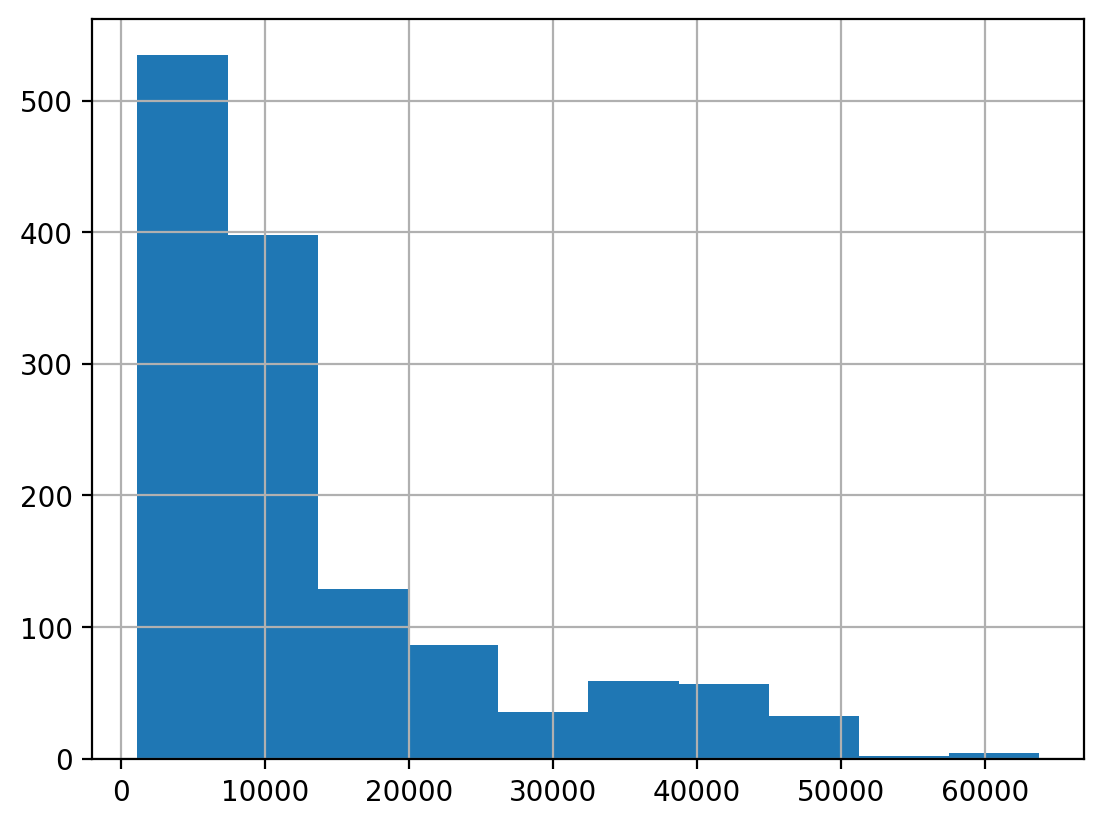

In [3]:
data['charges'].hist();

* The data distribution of the target variable is not suitable to proceed further. If this is the case in real time project then you have to build a model out of this data that can predict something.

In [5]:
# Basic Data Exploration
data.head()
data.info() # provides the summarized information of the data
data.describe(include ='all') # provides the discriptive statistical details of the data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337,1337.000000,1337.000000,1337,1337,1337.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,675,NaN,NaN,1063,364,NaN
mean,39.222139,NaN,30.663452,1.095737,NaN,NaN,13279.121487
std,14.044333,NaN,6.100468,1.205571,NaN,NaN,12110.359656
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.290000,0.000000,NaN,NaN,4746.344000
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9386.161300
75%,51.000000,NaN,34.700000,2.000000,NaN,NaN,16657.717450


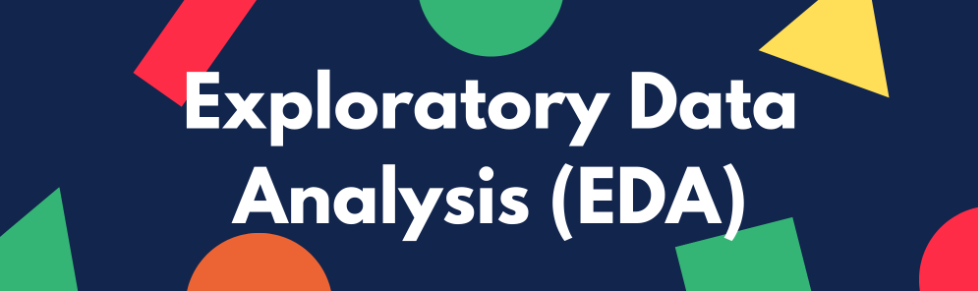

In [8]:
data.reset_index(inplace = True, drop = 'index')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.54830
1333,18,female,31.920,0,no,northeast,2205.98080
1334,18,female,36.850,0,no,southeast,1629.83350
1335,21,female,25.800,0,no,southwest,2007.94500


### Check For Missing Values

In [9]:
data.isna()
data.isna().sum() # Checking the missing values in the data

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1332,False,False,False,False,False,False,False
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

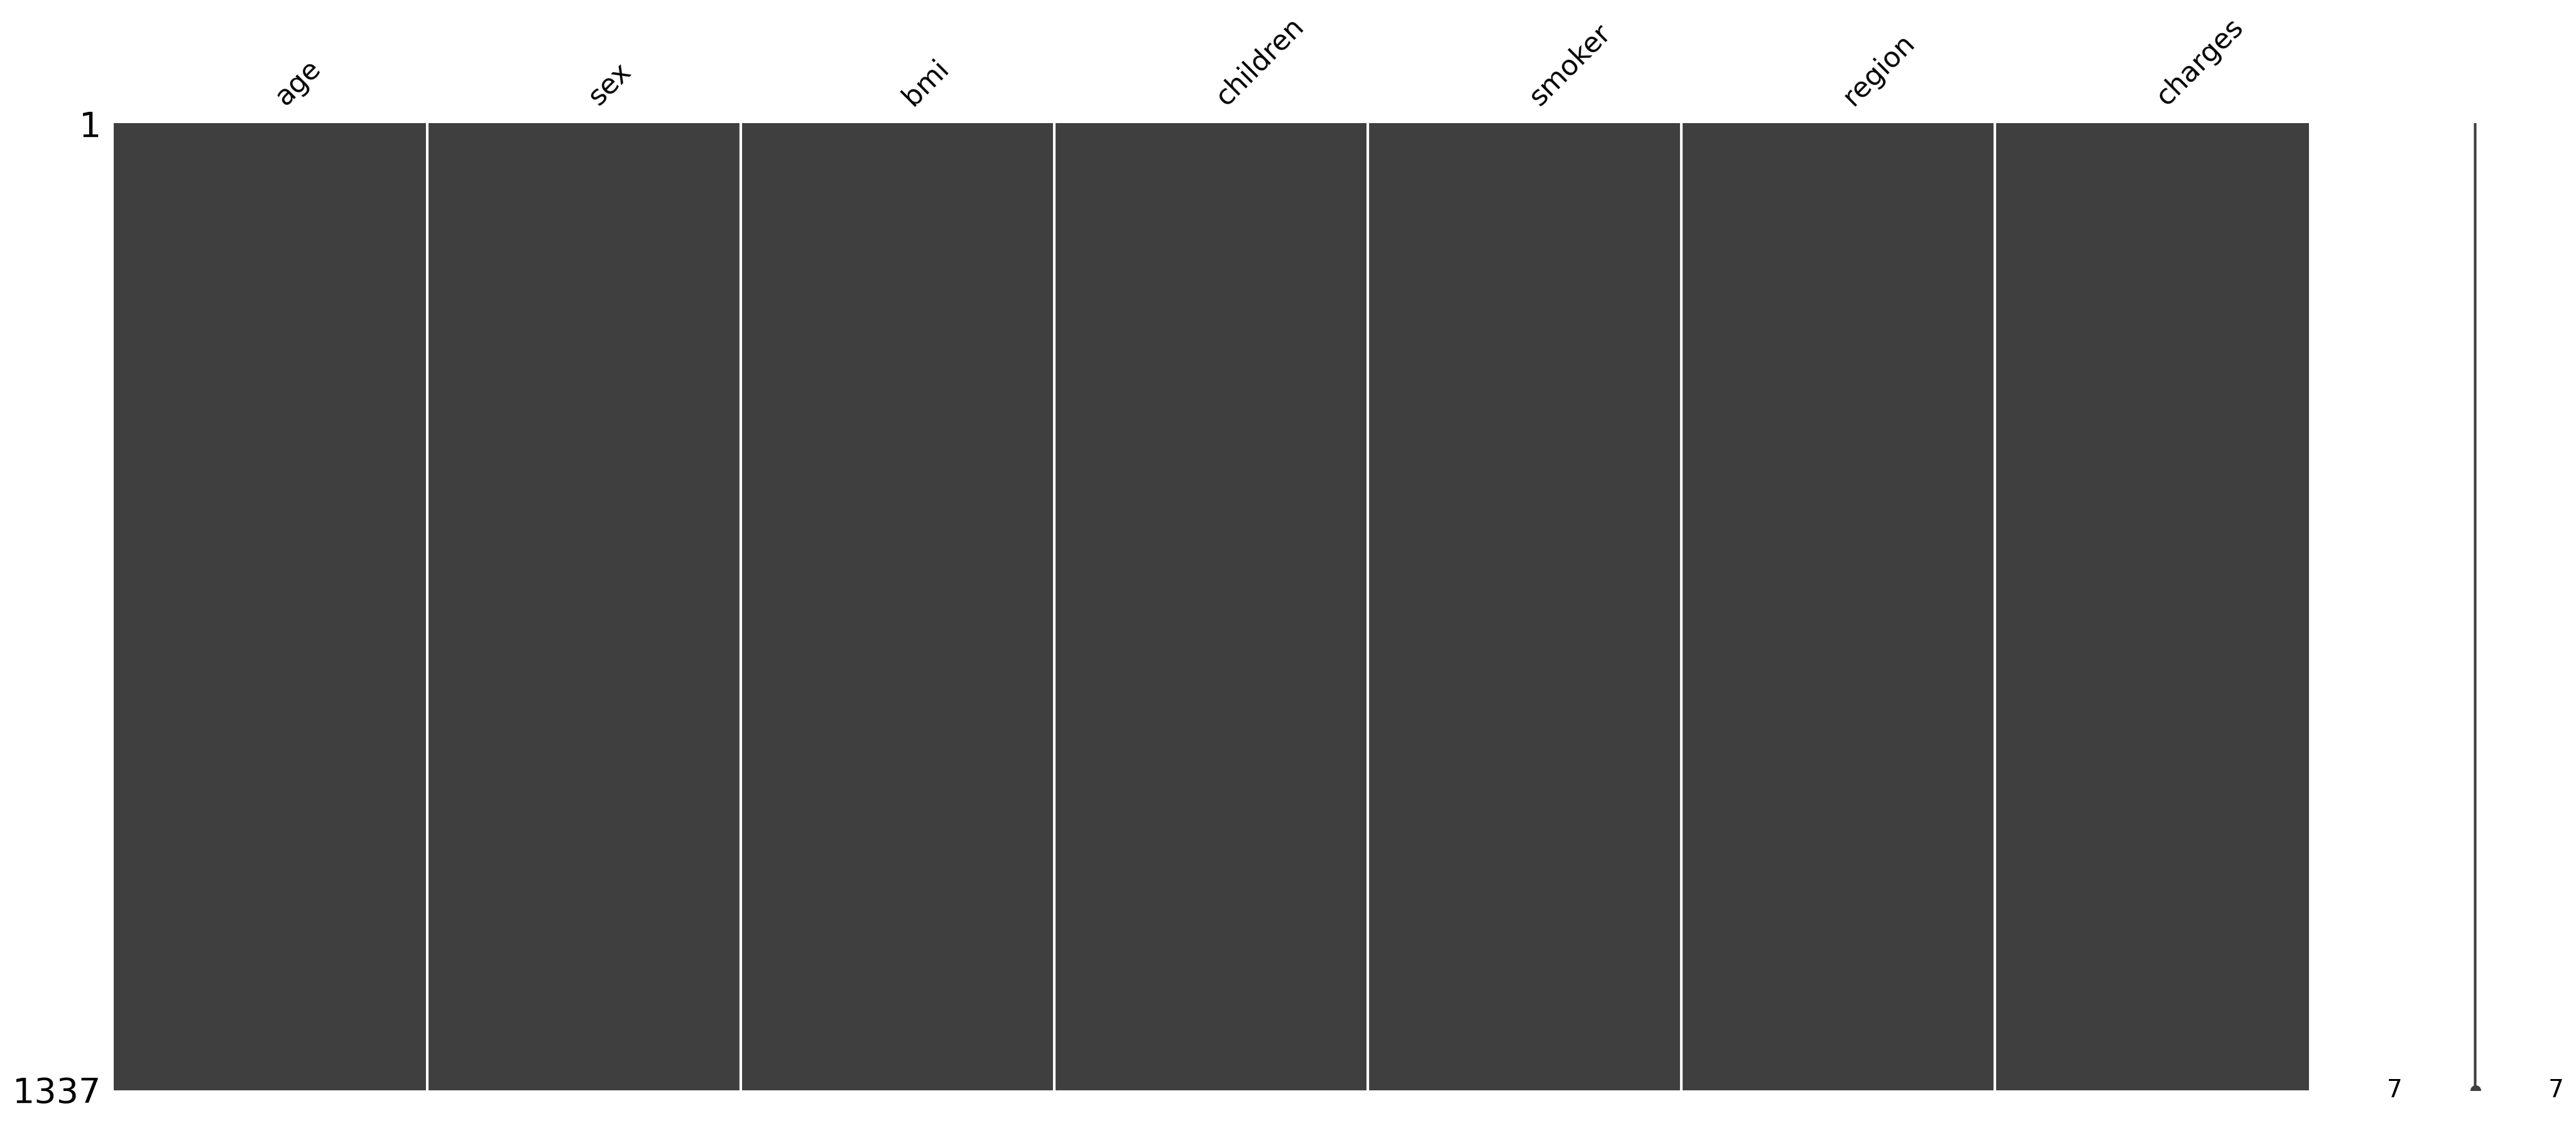

In [18]:
## Lets visualize:
# ! pip install missingno
msno.matrix(data)
plt.show();

### Visualize distribution of all the Continuous Predictor variables in the data using histograms

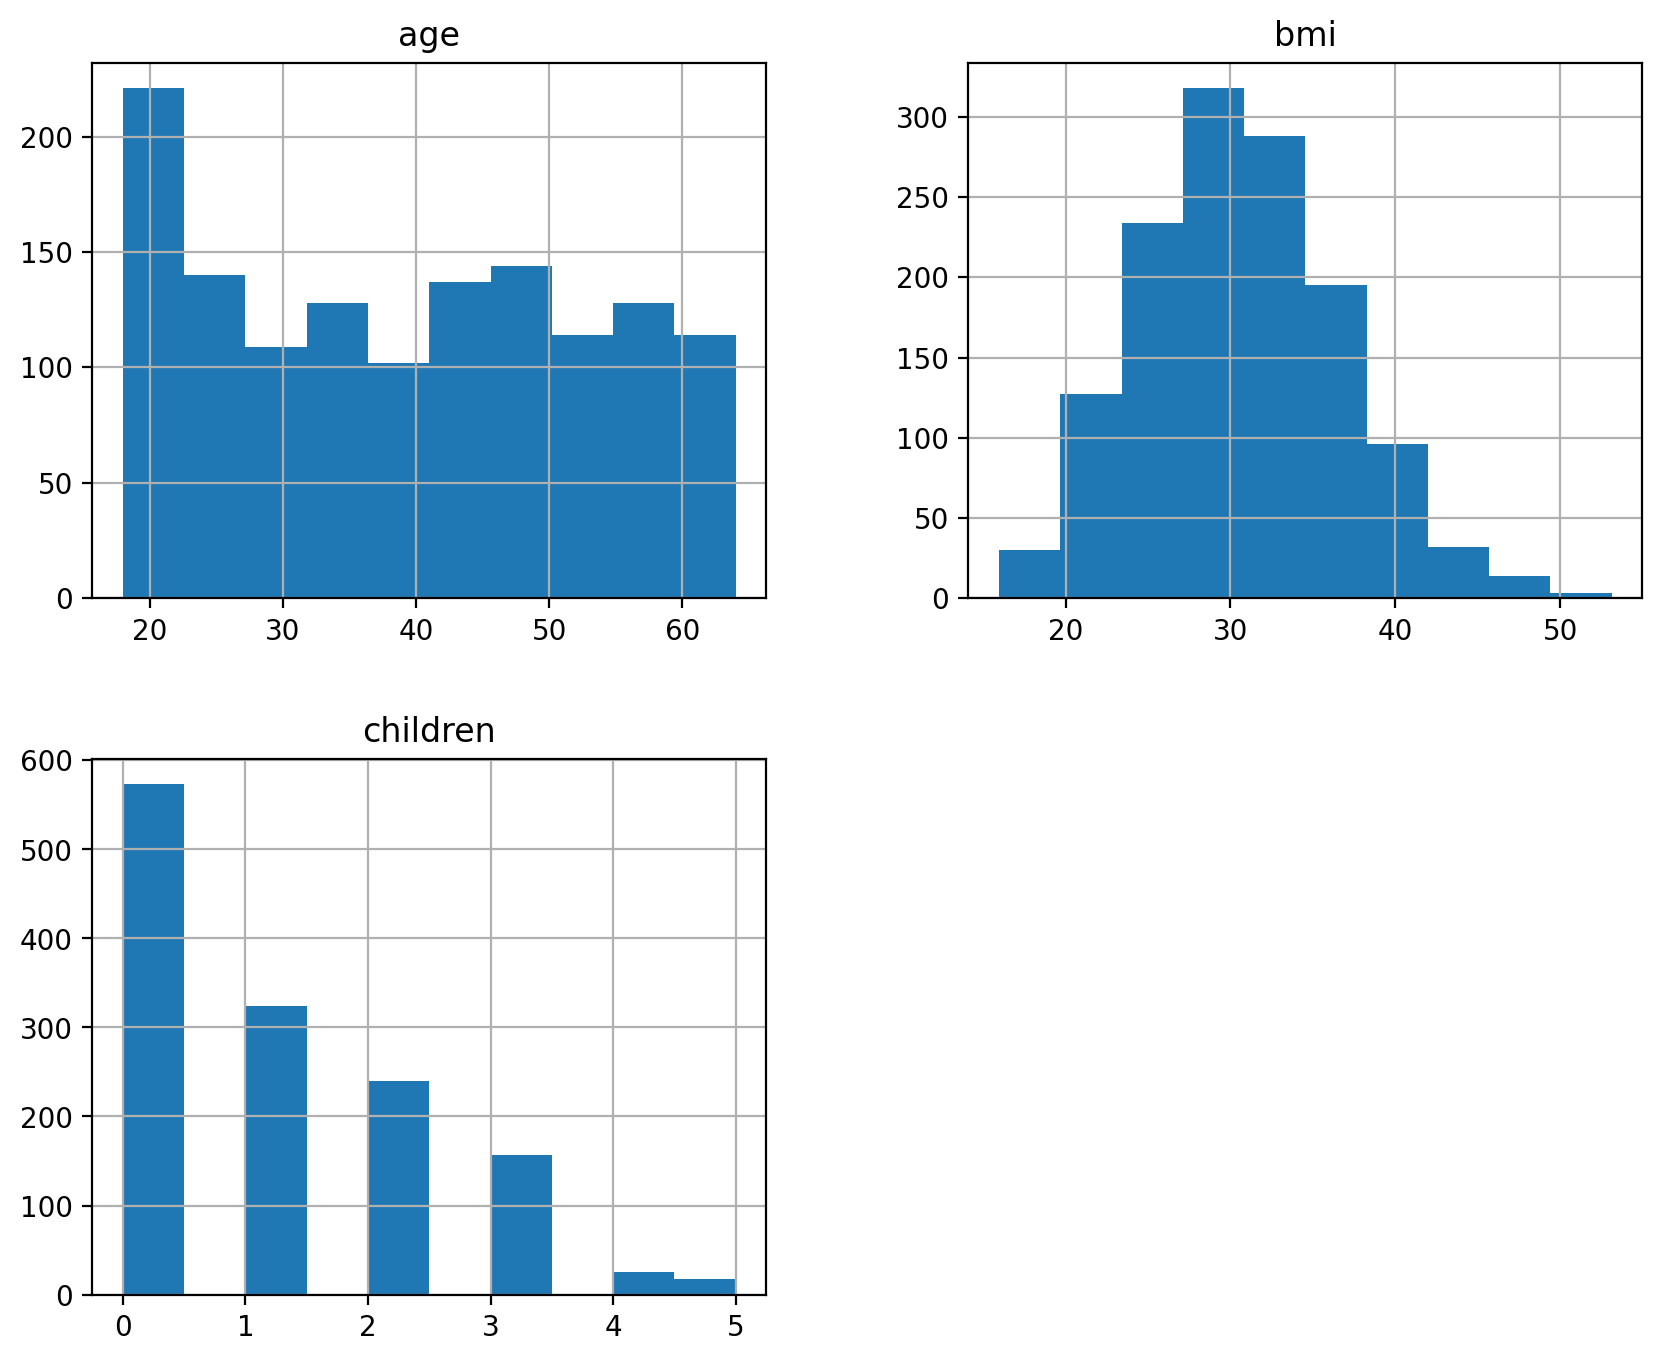

In [21]:
# Plotting histograms of multiple columns together
data.hist(['age','bmi','children'],figsize=(10,8));

### Interpretation:

> Histograms shows us the data distribution for a single continuous variable.The X-axis shows the range of values and Y-axis represent the number of values in that range. 

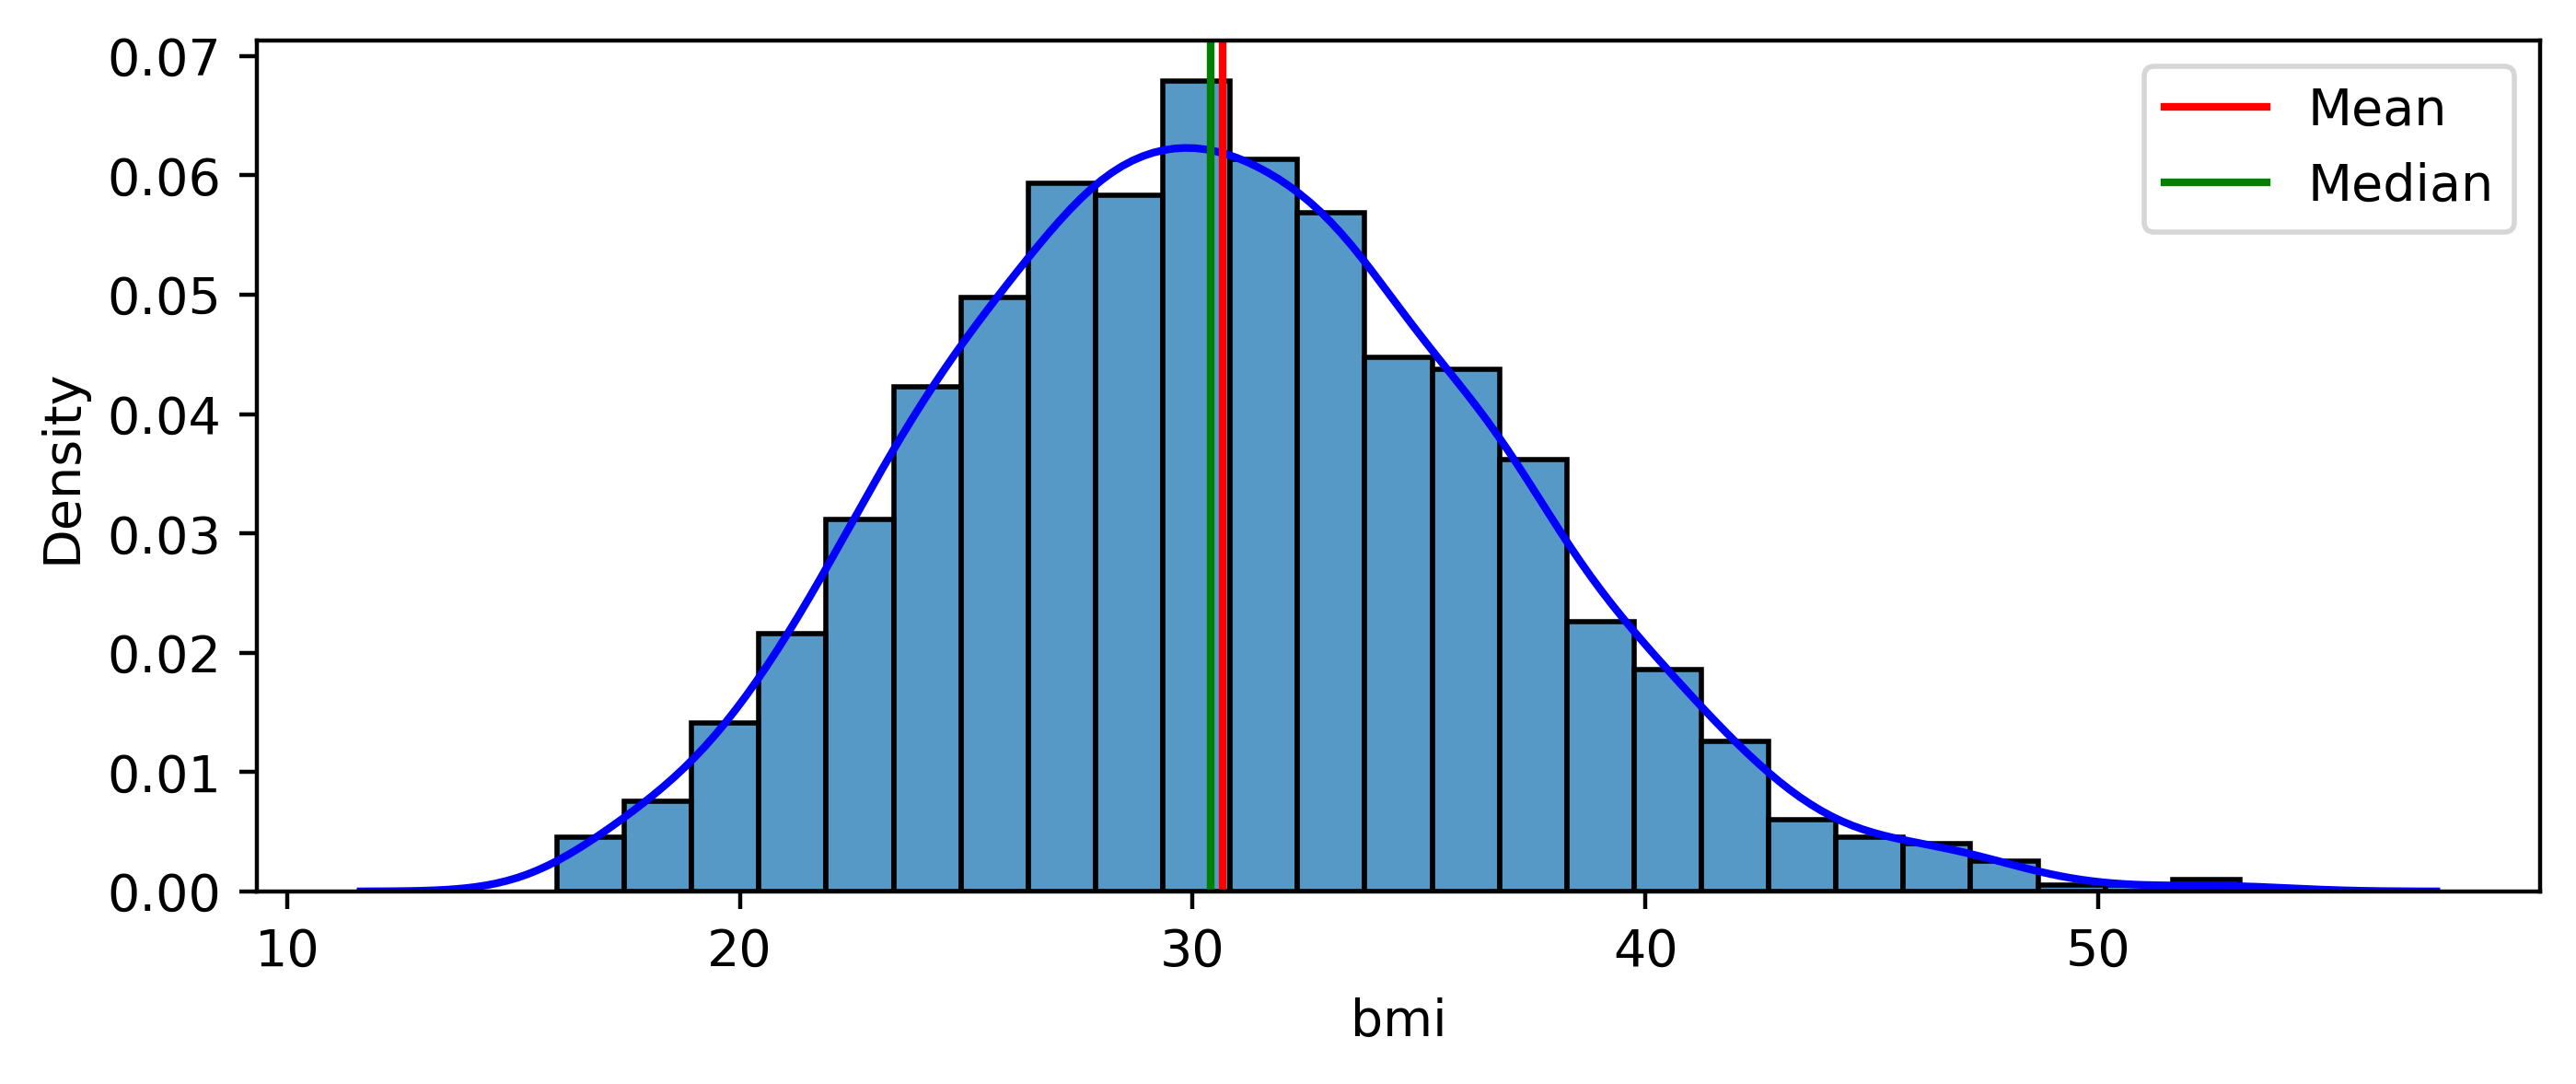

In [32]:
plt.figure(figsize=(8,3),dpi = 200)
sns.histplot(data.bmi,stat = 'density')
sns.kdeplot(data.bmi, color = 'blue')
plt.axvline(data.bmi.mean(), color = 'red', label = 'Mean')
plt.axvline(data.bmi.median(), color = 'green', label = 'Median')
plt.legend();

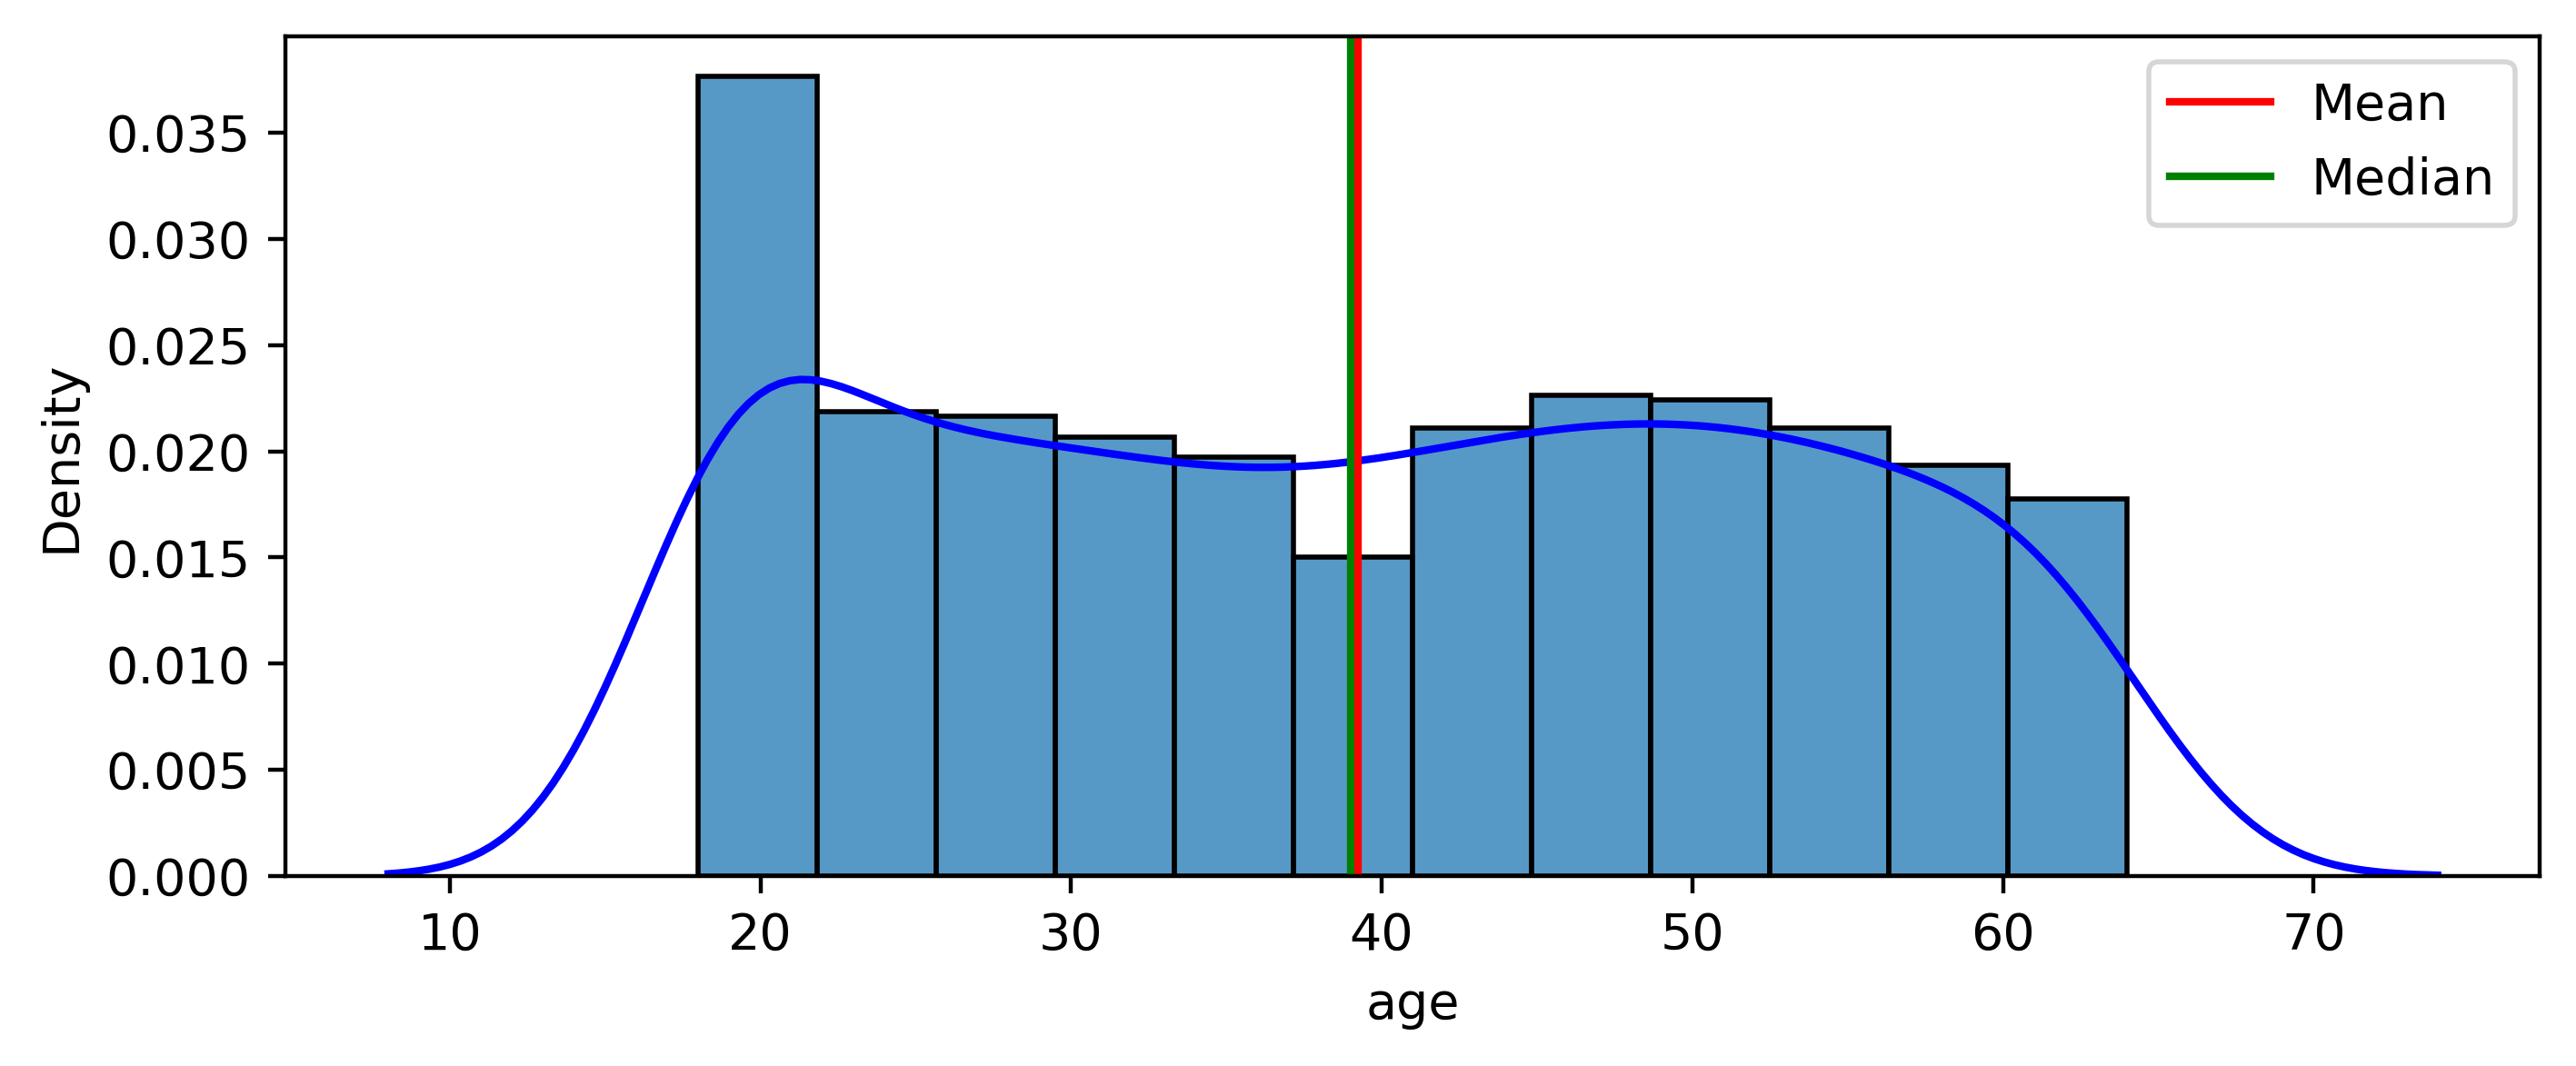

In [33]:
plt.figure(figsize=(8,3),dpi = 200)
sns.histplot(data.age,stat = 'density')
sns.kdeplot(data.age, color = 'blue')
plt.axvline(data.age.mean(), color = 'red', label = 'Mean')
plt.axvline(data.age.median(), color = 'green', label = 'Median')
plt.legend();

### Interpretation:
* The distributions are following normal distribution because they centered at mean

### Pearson's Correlation Test

>  **Tests whether the two samples have a linear relationship or not.**

> There should be linear relationship between input variable and the target variable i.e there should be dependency and the input variables should be independent of each other.

In [26]:
import scipy
from scipy import stats

In [27]:
def pearson(feature1, feature2, data):
    stat, p = stats.pearsonr(data[feature1], data[feature2])
    print('stat = %.3f, p = %.3f'%(stat,p))
    if p>0.03:
        print(f'features {feature1} and {feature2} are independent')
    else: 
        print(f'features {feature1} and {feature2} are dependent')

In [29]:
pearson('age', 'charges', data)
print('-'*30)
pearson('bmi','charges',data)
print('-'*30)
pearson('children','charges', data)
print('-'*30)
pearson('age','bmi', data)
print('-'*30)
pearson('age','children',data)
print('-'*30)
pearson('bmi', 'children',data)

stat = 0.298, p = 0.000
features age and charges are dependent
------------------------------
stat = 0.198, p = 0.000
features bmi and charges are dependent
------------------------------
stat = 0.067, p = 0.014
features children and charges are dependent
------------------------------
stat = 0.109, p = 0.000
features age and bmi are dependent
------------------------------
stat = 0.042, p = 0.129
features age and children are independent
------------------------------
stat = 0.013, p = 0.641
features bmi and children are independent


### Outlier Check

### Skewness:
**Skewness refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution, in a set of data. If the curve is shifted to the left or to the right, it is said to be skewed.**


* Less than -1 or greater than 1, then the distribution is highly skewed.
* Between -1 and -0.5 or 0.5 and 1, then the distribution is moderately skewed.
* Between -0.5 and 0.5, then the distribution is approx. symmetric.
* When skewness = 0, then the data is perfrctly symmetric.

In [15]:
# check for the Skewness to see if there are any presence of outliers:
data.skew()

age         0.054781
bmi         0.283914
children    0.937421
charges     1.515391
dtype: float64

### Outlier Treatment 
* Outliers are extreme values in the data which are far away from most of the values. You can see them as the tails in the histogram. Outlier must be treated one column at a time. As the treatment will be slightly different for each column.

### Why I should treat the outliers?

* Outliers bias the training of machine learning models. As the algorithm tries to fit the extreme value, it goes away from majority of the data.

**There are below two options to treat outliers in the data.**

* Option-1: Delete the outlier Records. Only if there are just few rows lost.
* Option-2: Impute the outlier values with a logical business value

### Observation: 
* We only have two continuous input variables and there are no outliers in them so no need of outlier treatment.

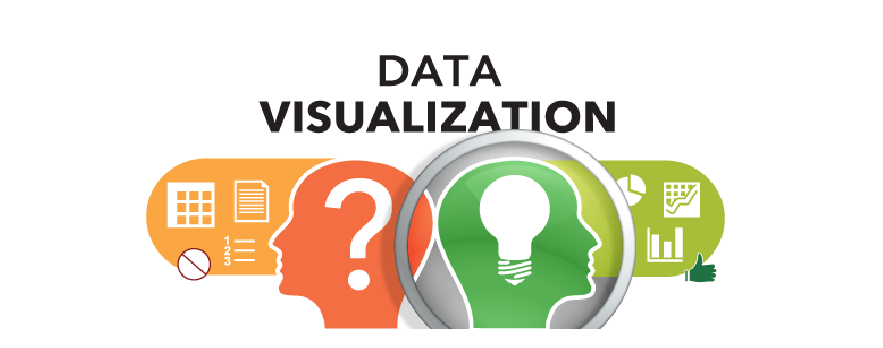

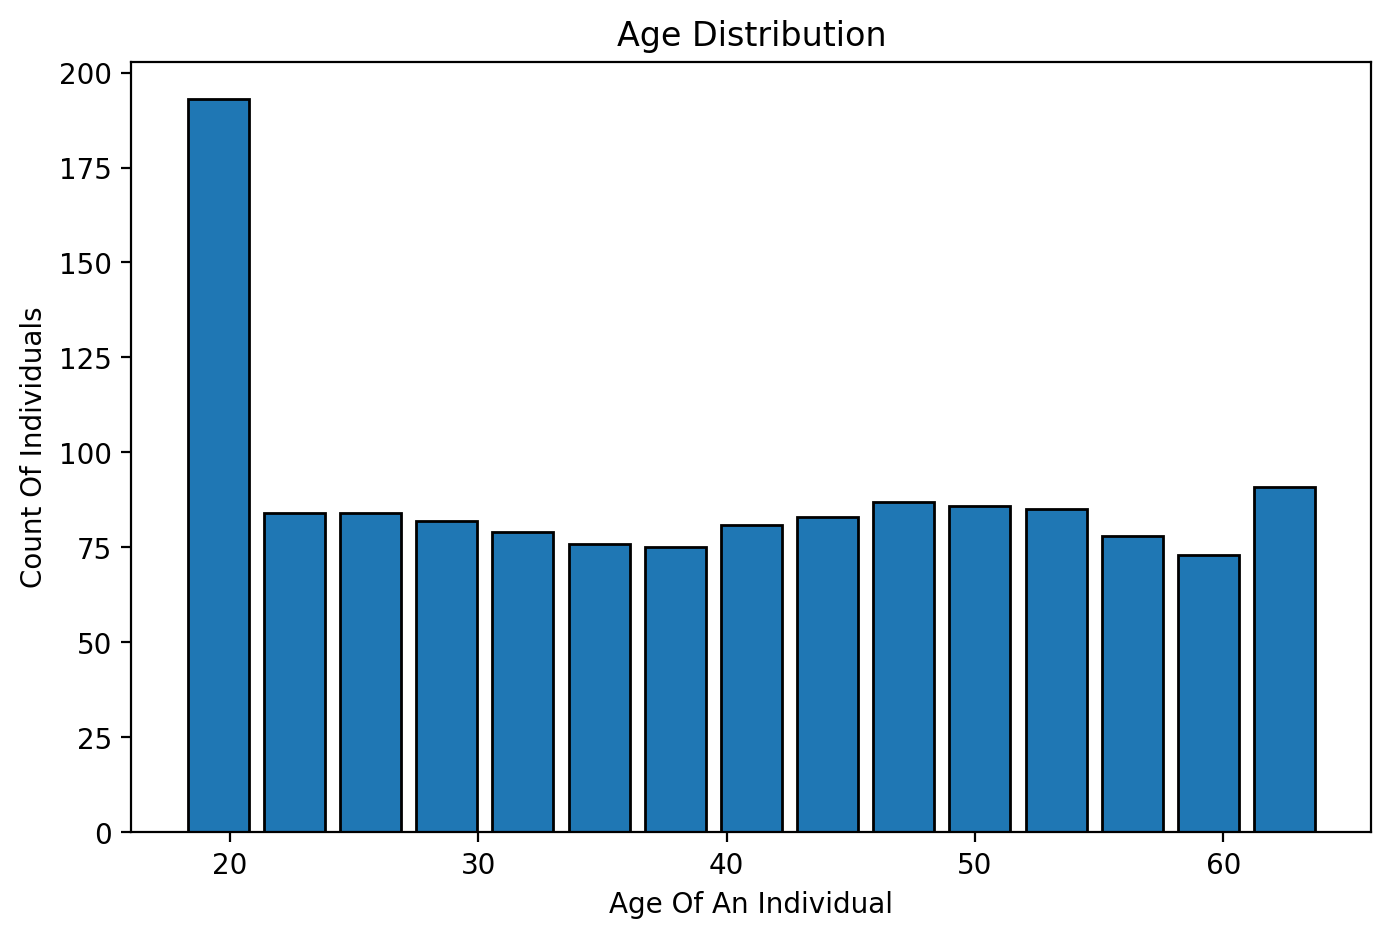

In [78]:
# Histogram of age distribution
plt.figure(figsize=(8, 5))
plt.hist(data['age'], bins=15, edgecolor='Black', rwidth=0.8)
plt.xlabel('Age Of An Individual')
plt.ylabel('Count Of Individuals')
plt.title('Age Distribution')
plt.show();

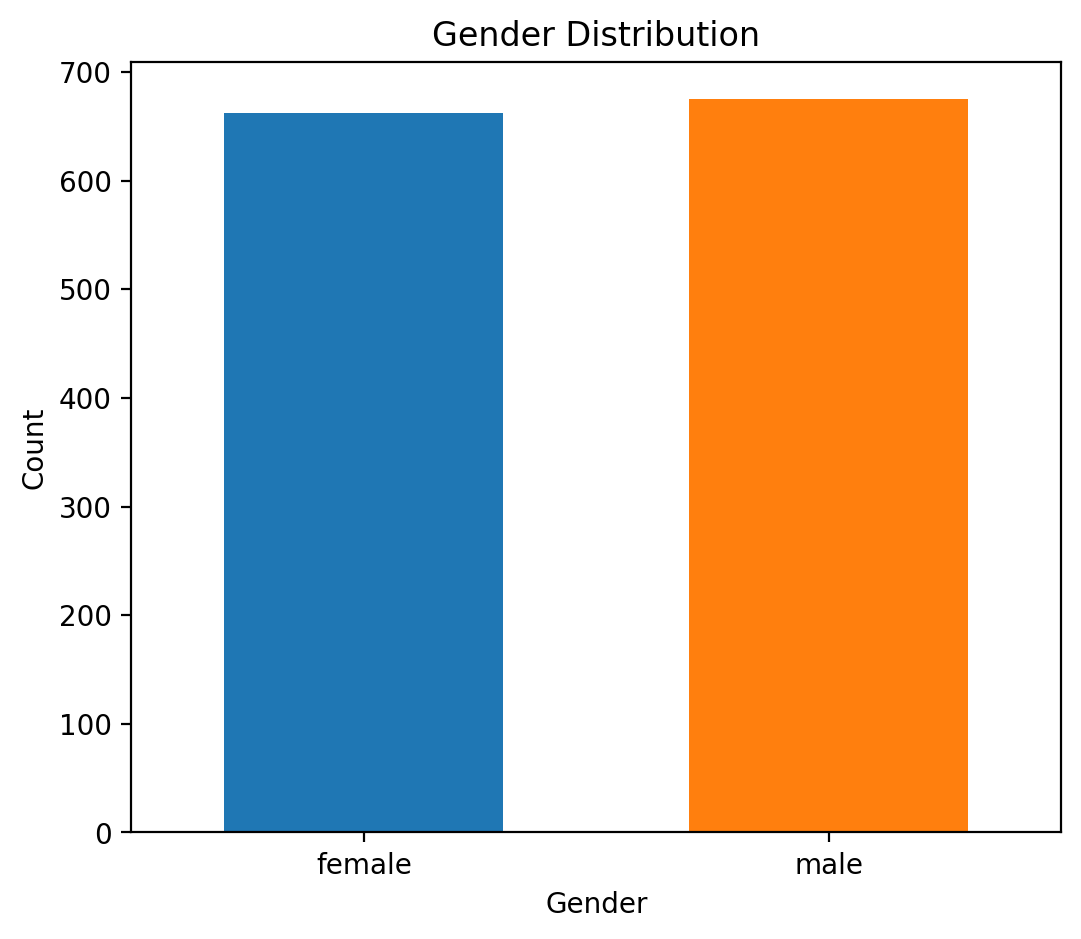

In [81]:
# Bar plot of gender distribution
plt.figure(figsize=(6,5))
sns.countplot(data = data, x ='sex',width=0.6, saturation=1)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show();

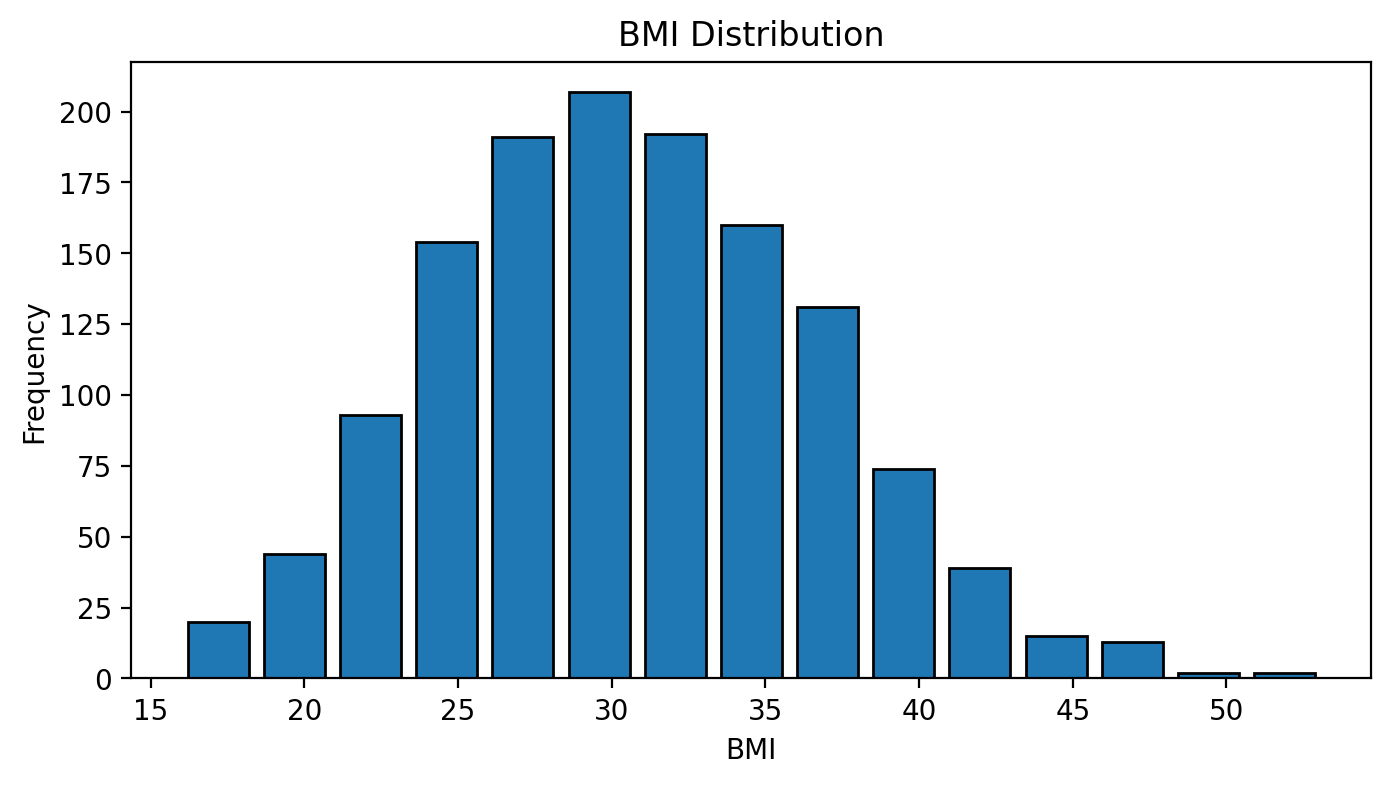

In [83]:
# Histogram of BMI values
plt.figure(figsize=(8, 4))
plt.hist(data['bmi'], bins=15, edgecolor='black',rwidth=0.8)
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('BMI Distribution')
plt.show();

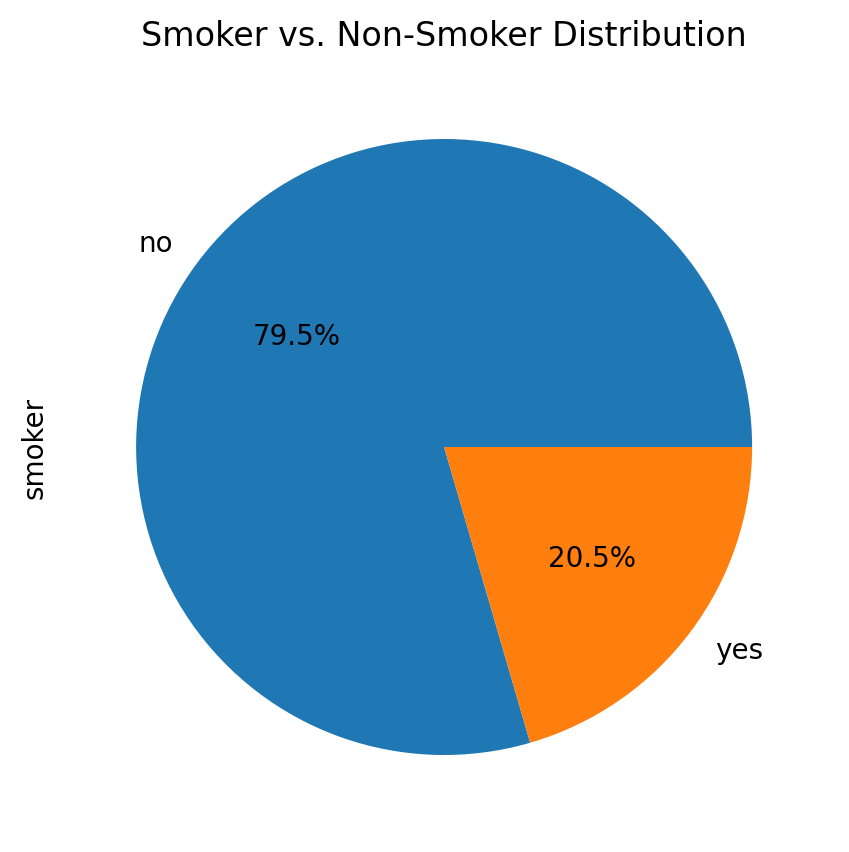

In [95]:
# Pie chart of smoker vs. non-smoker distribution
plt.figure(figsize=(5,5))
data['smoker'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Smoker vs. Non-Smoker Distribution')
plt.show();

#### Pair Plot 

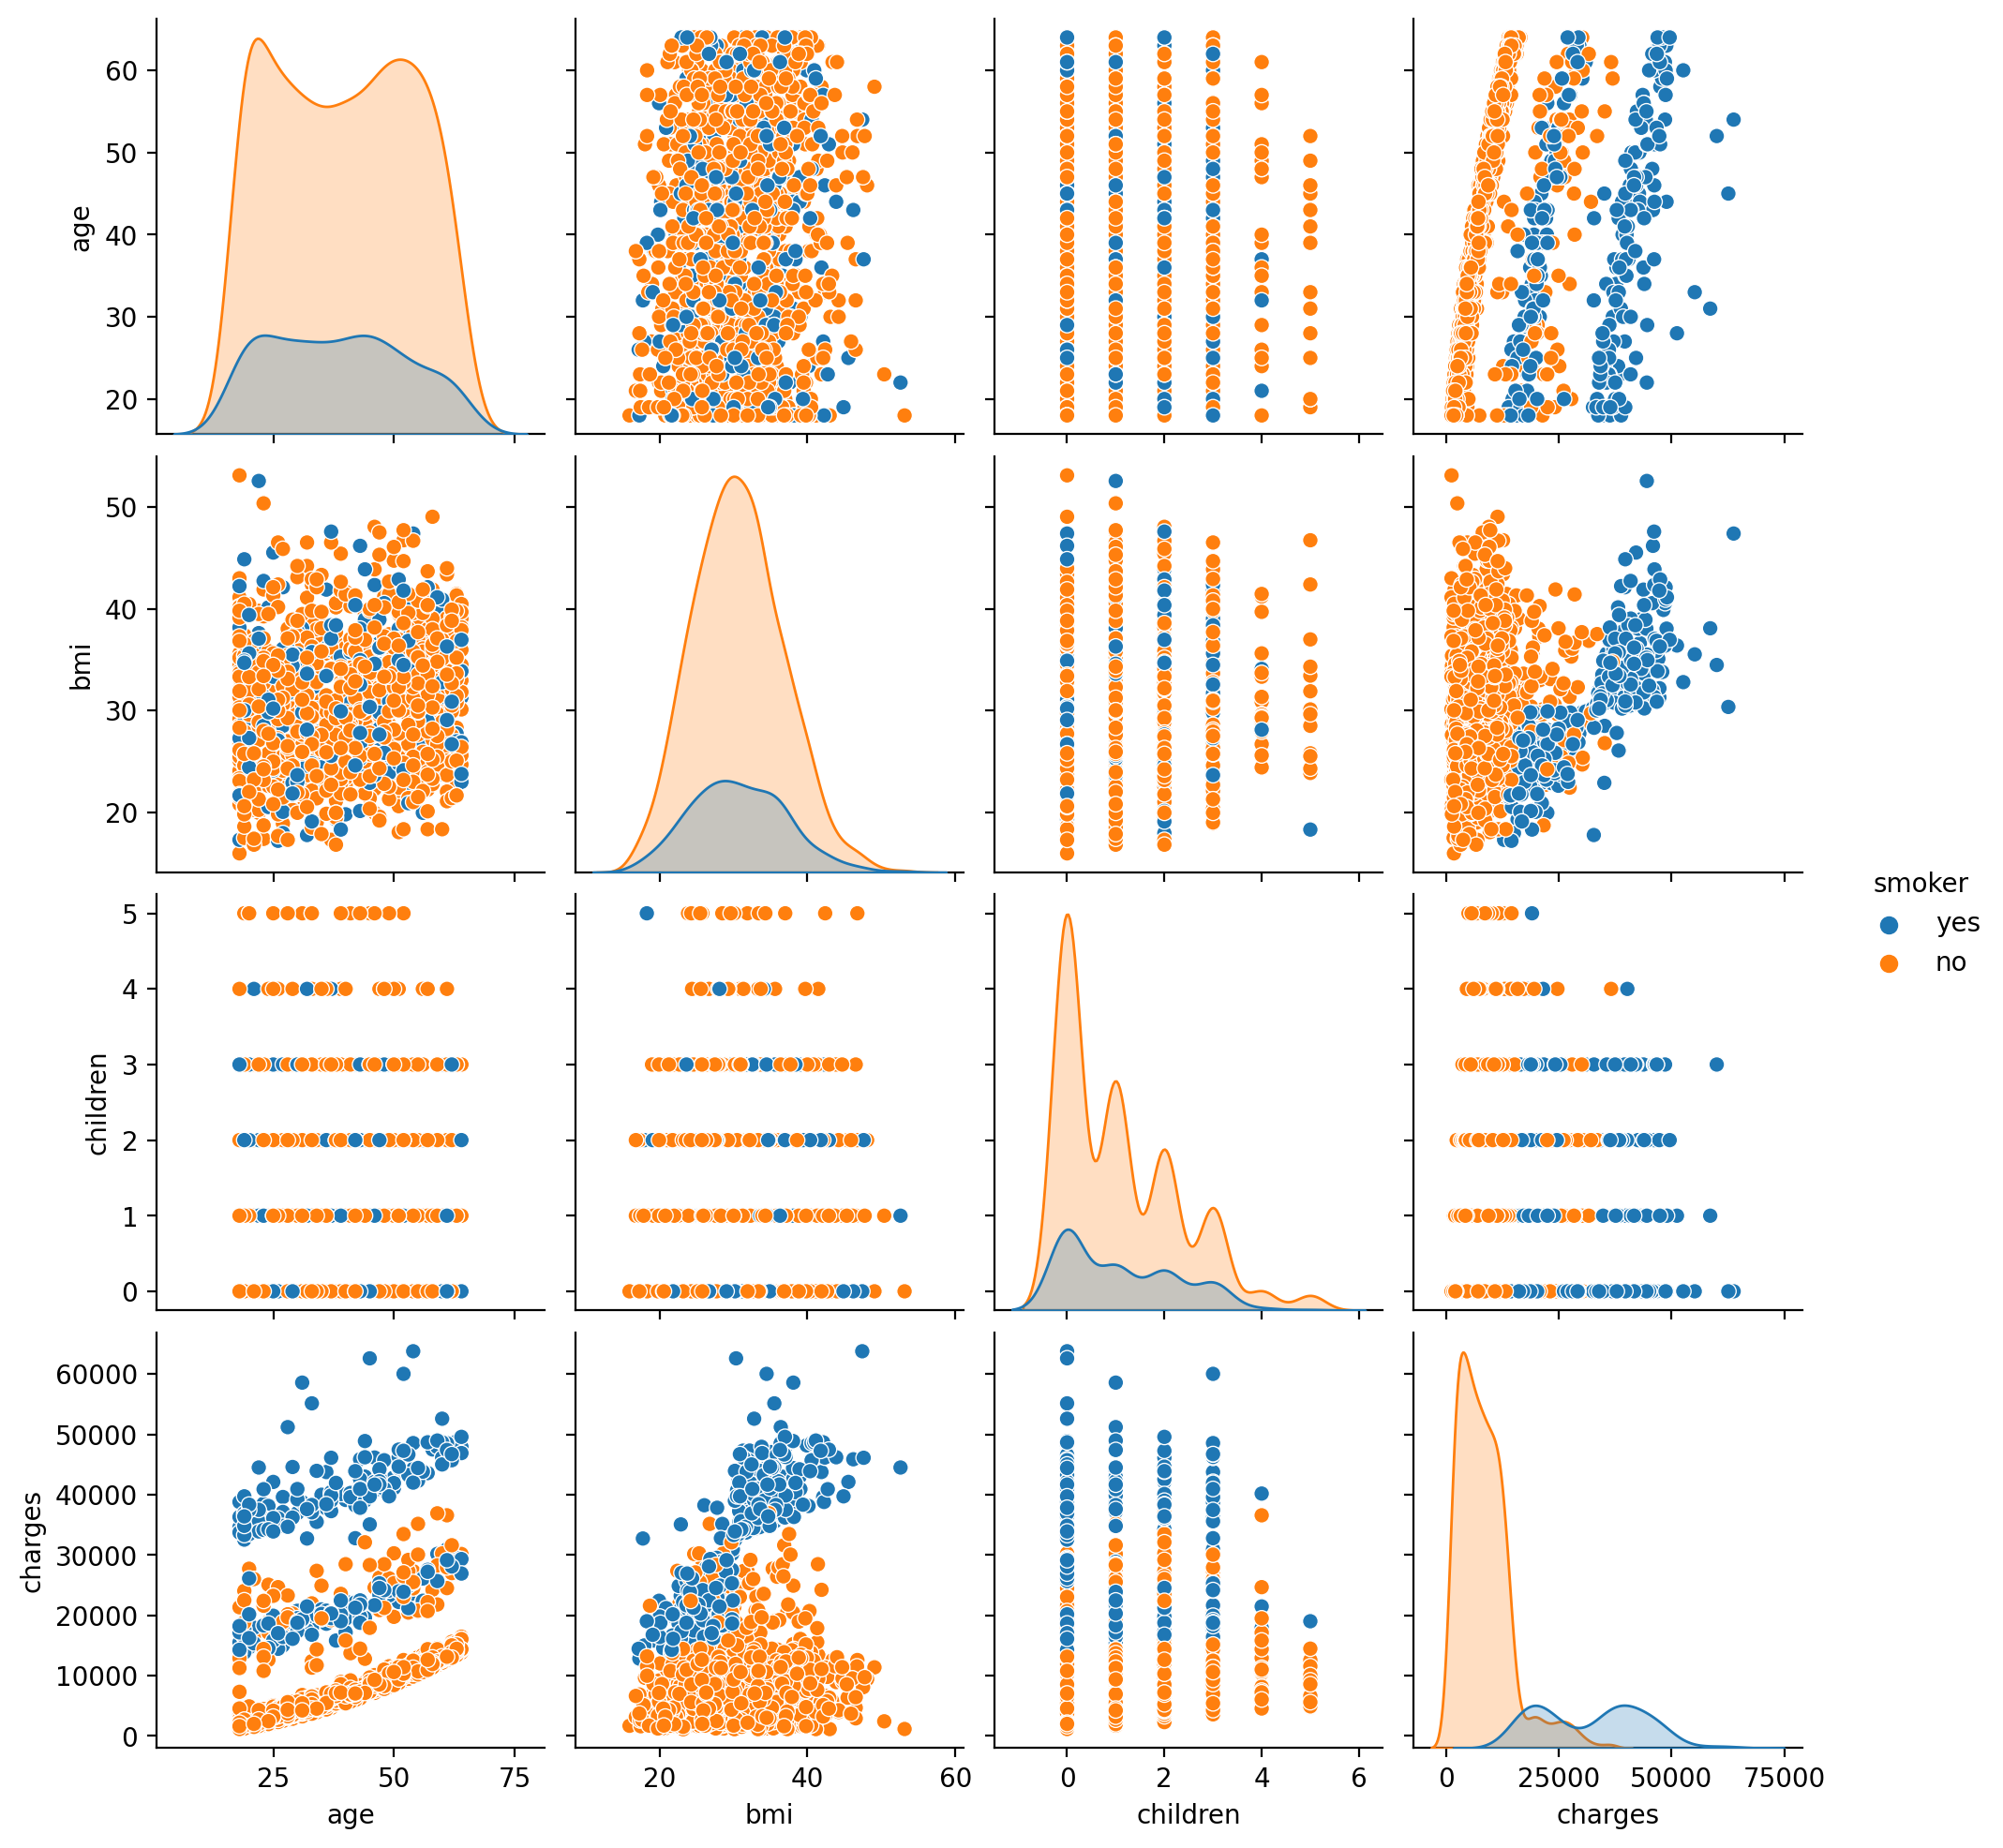

In [19]:
sns.pairplot(data, hue = 'smoker');

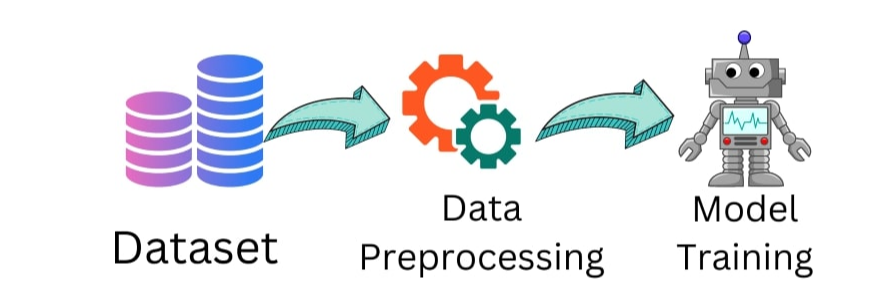

### Data Segregation 

In [27]:
y=data['charges']
X=data[['age','sex', 'bmi', 'children','smoker']] 


### Split the dataset into Training and Testing (recommended 70:30 split).

In [28]:
# splitting the historical data into train and test.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=27)

In [29]:
X_train.head()

,age,sex,bmi,children,smoker
1166,29,female,24.600,2,no
643,43,male,35.310,2,no
103,61,female,29.920,3,yes
530,57,male,42.130,1,yes
1270,25,female,34.485,0,no


In [30]:
y_train.head()

1166     4529.47700
643     18806.14547
103     30942.19180
530     48675.51770
1270     3021.80915
Name: charges, dtype: float64

In [31]:
print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)

(935, 5) (935,)
(402, 5) (402,)


### Categorical and numerical data separation

In [32]:
X_train.dtypes # viewing the datatypes to seperate them

age           int64
sex          object
bmi         float64
children      int64
smoker       object
dtype: object

In [33]:
X_categorical = X_train.select_dtypes(include = ['object']) # segregating the object feature 

In [34]:
X_categorical.head()

,sex,smoker
1166,female,no
643,male,no
103,female,yes
530,male,yes
1270,female,no


In [35]:
X_numerical = X_train.select_dtypes(include = ['int64', 'float64']) # segregating the Numerical feature

In [36]:
X_numerical.head()

,age,bmi,children
1166,29,24.600,2
643,43,35.310,2
103,61,29.920,3
530,57,42.130,1
1270,25,34.485,0


In [37]:
X_cat_test = X_test.select_dtypes(include = ['object'])

In [38]:
X_cat_test.head()

,sex,smoker
182,male,no
571,female,no
1136,female,no
779,male,yes
1006,male,yes


In [39]:
X_num_test = X_test.select_dtypes(include = ['int64', 'float64'])

In [40]:
X_num_test.head()

,age,bmi,children
182,22,19.950,3
571,18,37.290,1
1136,26,22.230,0
779,30,24.400,3
1006,47,28.215,3


### Data preparation on train data:

In [41]:
scaler = StandardScaler()

X_num_trans = pd.DataFrame(scaler.fit_transform(X_numerical),
                                     columns = X_numerical.columns,
                                     index = X_numerical.index)
X_num_trans.head()

,age,bmi,children
1166,-0.742851,-1.001305,0.765906
643,0.260442,0.721927,0.765906
103,1.550391,-0.145320,1.608402
530,1.263736,1.819260,-0.076591
1270,-1.029506,0.589185,-0.919087


In [42]:
ohe = OneHotEncoder(drop='first', sparse=False)

X_cat_trans = pd.DataFrame(ohe.fit_transform(X_categorical), 
                               columns=ohe.get_feature_names_out(X_categorical.columns), 
                               index = X_categorical.index)

X_cat_trans.head()

,sex_male,smoker_yes
1166,0.0,0.0
643,1.0,0.0
103,0.0,1.0
530,1.0,1.0
1270,0.0,0.0


### Data preparation on test data:

In [43]:
X_num_test_trans = pd.DataFrame(scaler.transform(X_num_test),
                                     columns = X_num_test.columns,
                                     index = X_num_test.index)
X_num_test_trans.head()

,age,bmi,children
182,-1.244497,-1.749486,1.608402
571,-1.531153,1.040507,-0.076591
1136,-0.957842,-1.382636,-0.919087
779,-0.671187,-1.033485,1.608402
1006,0.547098,-0.419654,1.608402


In [44]:
X_cat_test_trans = pd.DataFrame(ohe.transform(X_cat_test), 
                               columns=ohe.get_feature_names_out(X_cat_test.columns), 
                               index = X_cat_test.index)

X_cat_test_trans.head()

,sex_male,smoker_yes
182,1.0,0.0
571,0.0,0.0
1136,0.0,0.0
779,1.0,1.0
1006,1.0,1.0


### concating train numerical and categorical

In [45]:
X_train_transform = pd.concat([X_num_trans,X_cat_trans], axis = 1)
X_train_transform.head()

,age,bmi,children,sex_male,smoker_yes
1166,-0.742851,-1.001305,0.765906,0.0,0.0
643,0.260442,0.721927,0.765906,1.0,0.0
103,1.550391,-0.145320,1.608402,0.0,1.0
530,1.263736,1.819260,-0.076591,1.0,1.0
1270,-1.029506,0.589185,-0.919087,0.0,0.0


### concating test numerical and categorical

In [46]:
X_test_transform = pd.concat([X_num_test_trans,X_cat_test_trans], axis = 1)
X_test_transform.head()

,age,bmi,children,sex_male,smoker_yes
182,-1.244497,-1.749486,1.608402,1.0,0.0
571,-1.531153,1.040507,-0.076591,0.0,0.0
1136,-0.957842,-1.382636,-0.919087,0.0,0.0
779,-0.671187,-1.033485,1.608402,1.0,1.0
1006,0.547098,-0.419654,1.608402,1.0,1.0


### Model Building (With the presence of `Outliers`)

In [47]:
regressor = RandomForestRegressor()
regressor.fit(X_train_transform, y_train)

RandomForestRegressor()

### Residual Analysis on Training Data

In [48]:
y_train_pred = regressor.predict(X_train_transform)

In [49]:
# Adjusted R^2
def Adjusted_r2(y_train,y_train_pred,X_train_transform):
    r2 = metrics.r2_score(y_train, y_train_pred)
    n = len(y_train)
    k = X_train_transform.shape[1]

    r2_adj = 1 - (1-r2)*(n-1)/(n-k-1)
    return r2_adj

In [50]:
Adjusted_r2(y_train,y_train_pred,X_train_transform)

0.9748452778630584

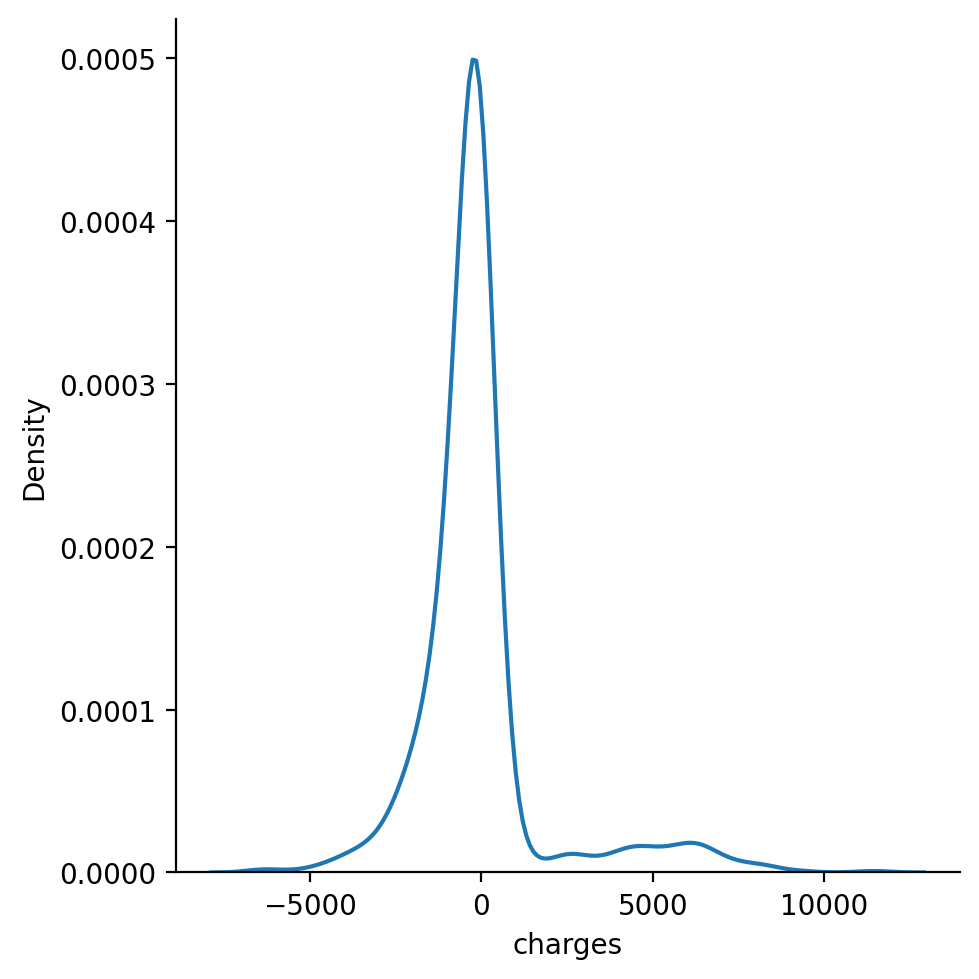

In [51]:
residual = y_train - y_train_pred

sns.displot(residual, kind='kde');

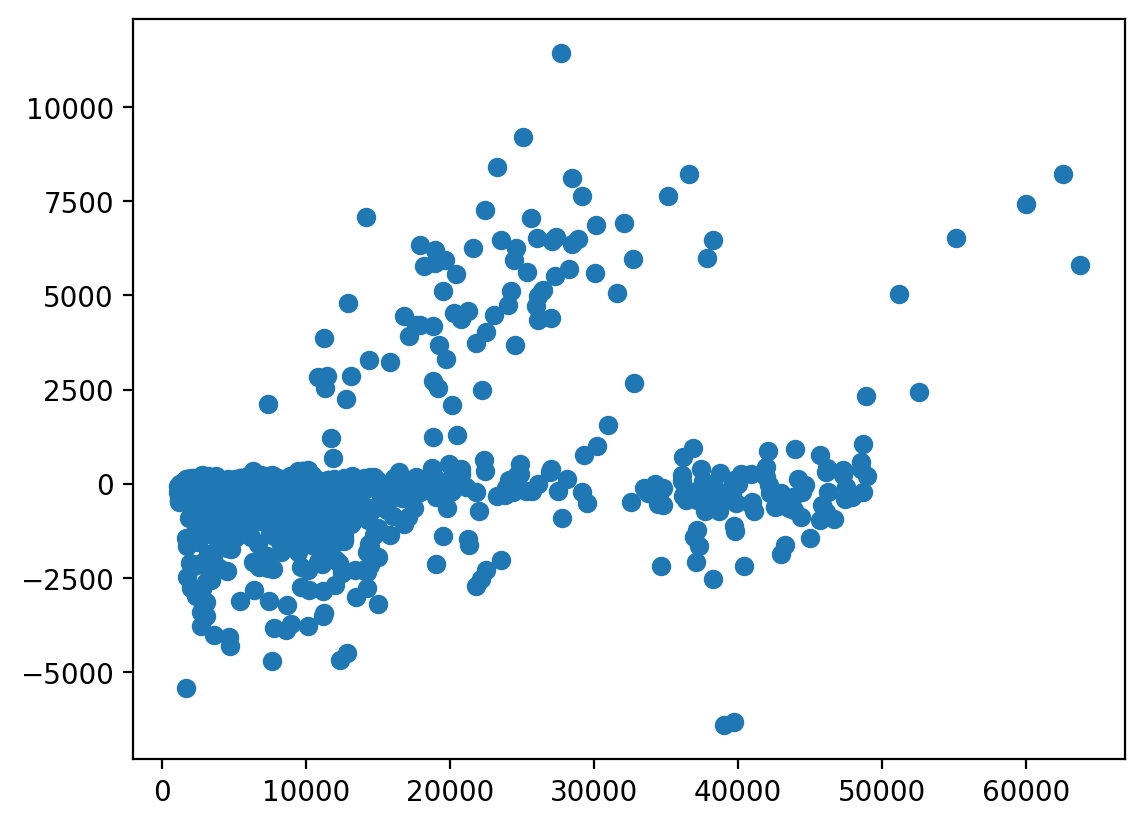

In [52]:
plt.scatter(y_train, residual)

plt.show();

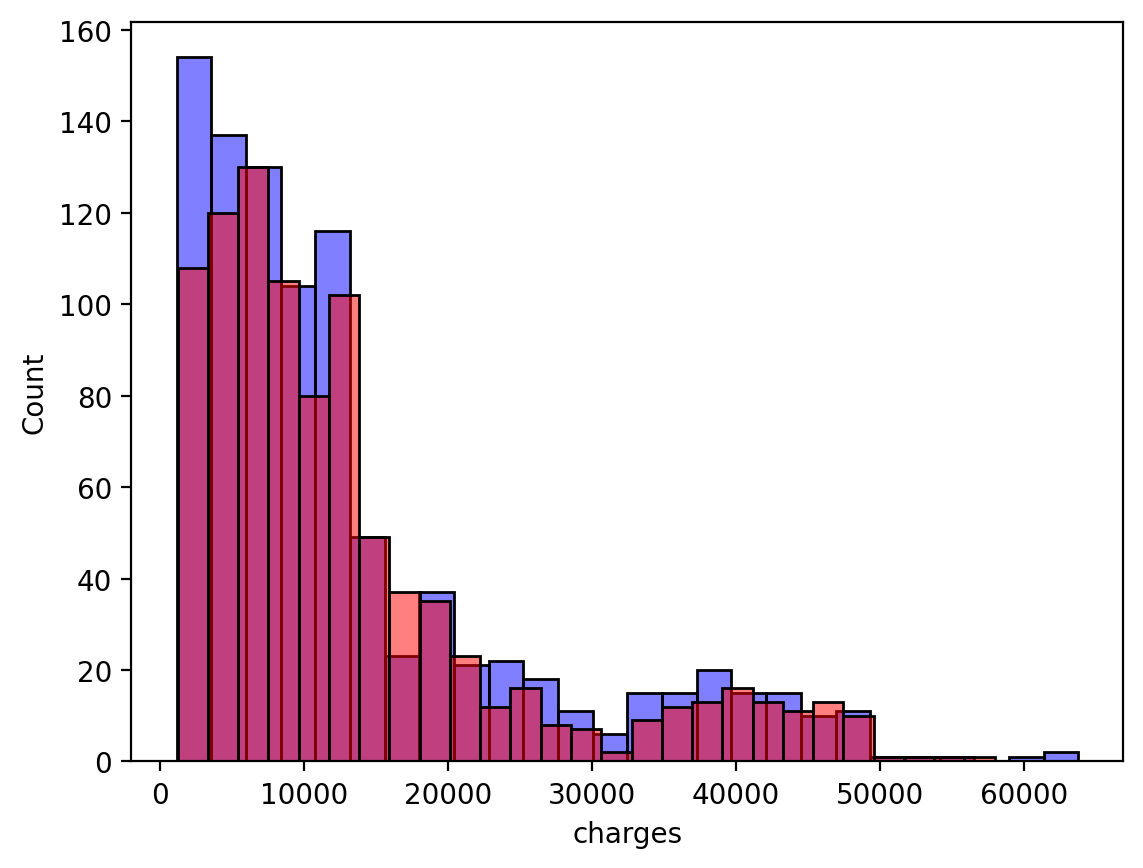

In [53]:
sns.histplot(y_train, color='blue', alpha=0.5)
sns.histplot(y_train_pred, color='red', alpha=0.5);

### Prediction on unseen data

In [54]:
y_test_pred = regressor.predict(X_test_transform)

In [55]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
temp_df

,Actual,Predicted
182,4005.42250,4243.630808
571,2219.44510,8851.500079
1136,3176.28770,5002.380451
779,18259.21600,19001.669485
1006,24915.22085,26461.068409
...,...,...
183,7419.47790,9615.722035
959,2730.10785,12372.805537
1203,18223.45120,17217.924265
1177,2899.48935,6135.499791


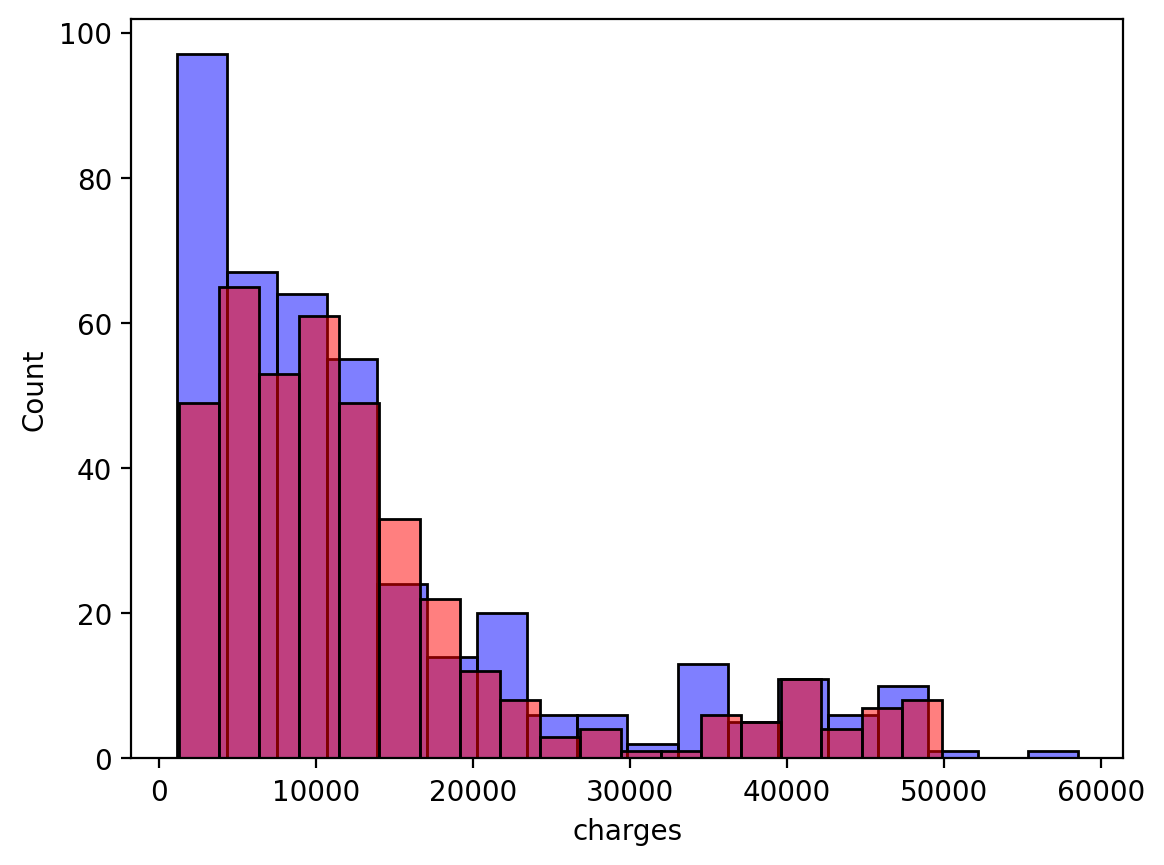

In [56]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5);

### Evaluation

In [57]:
# Adjusted R^2
def Adjusted_r2(y_test,y_tes_pred,X_test):
    r2 = metrics.r2_score(y_test, y_test_pred)
    n = len(y_test)
    k = X_test.shape[1]

    r2_adj = 1 - (1-r2)*(n-1)/(n-k-1)
    return r2_adj

In [58]:
Adjusted_r2(y_test,y_test_pred,X_test_transform)

0.8277133992363682

In [59]:
regressor.feature_importances_

array([0.13605142, 0.20844441, 0.02372947, 0.00634438, 0.62543032])

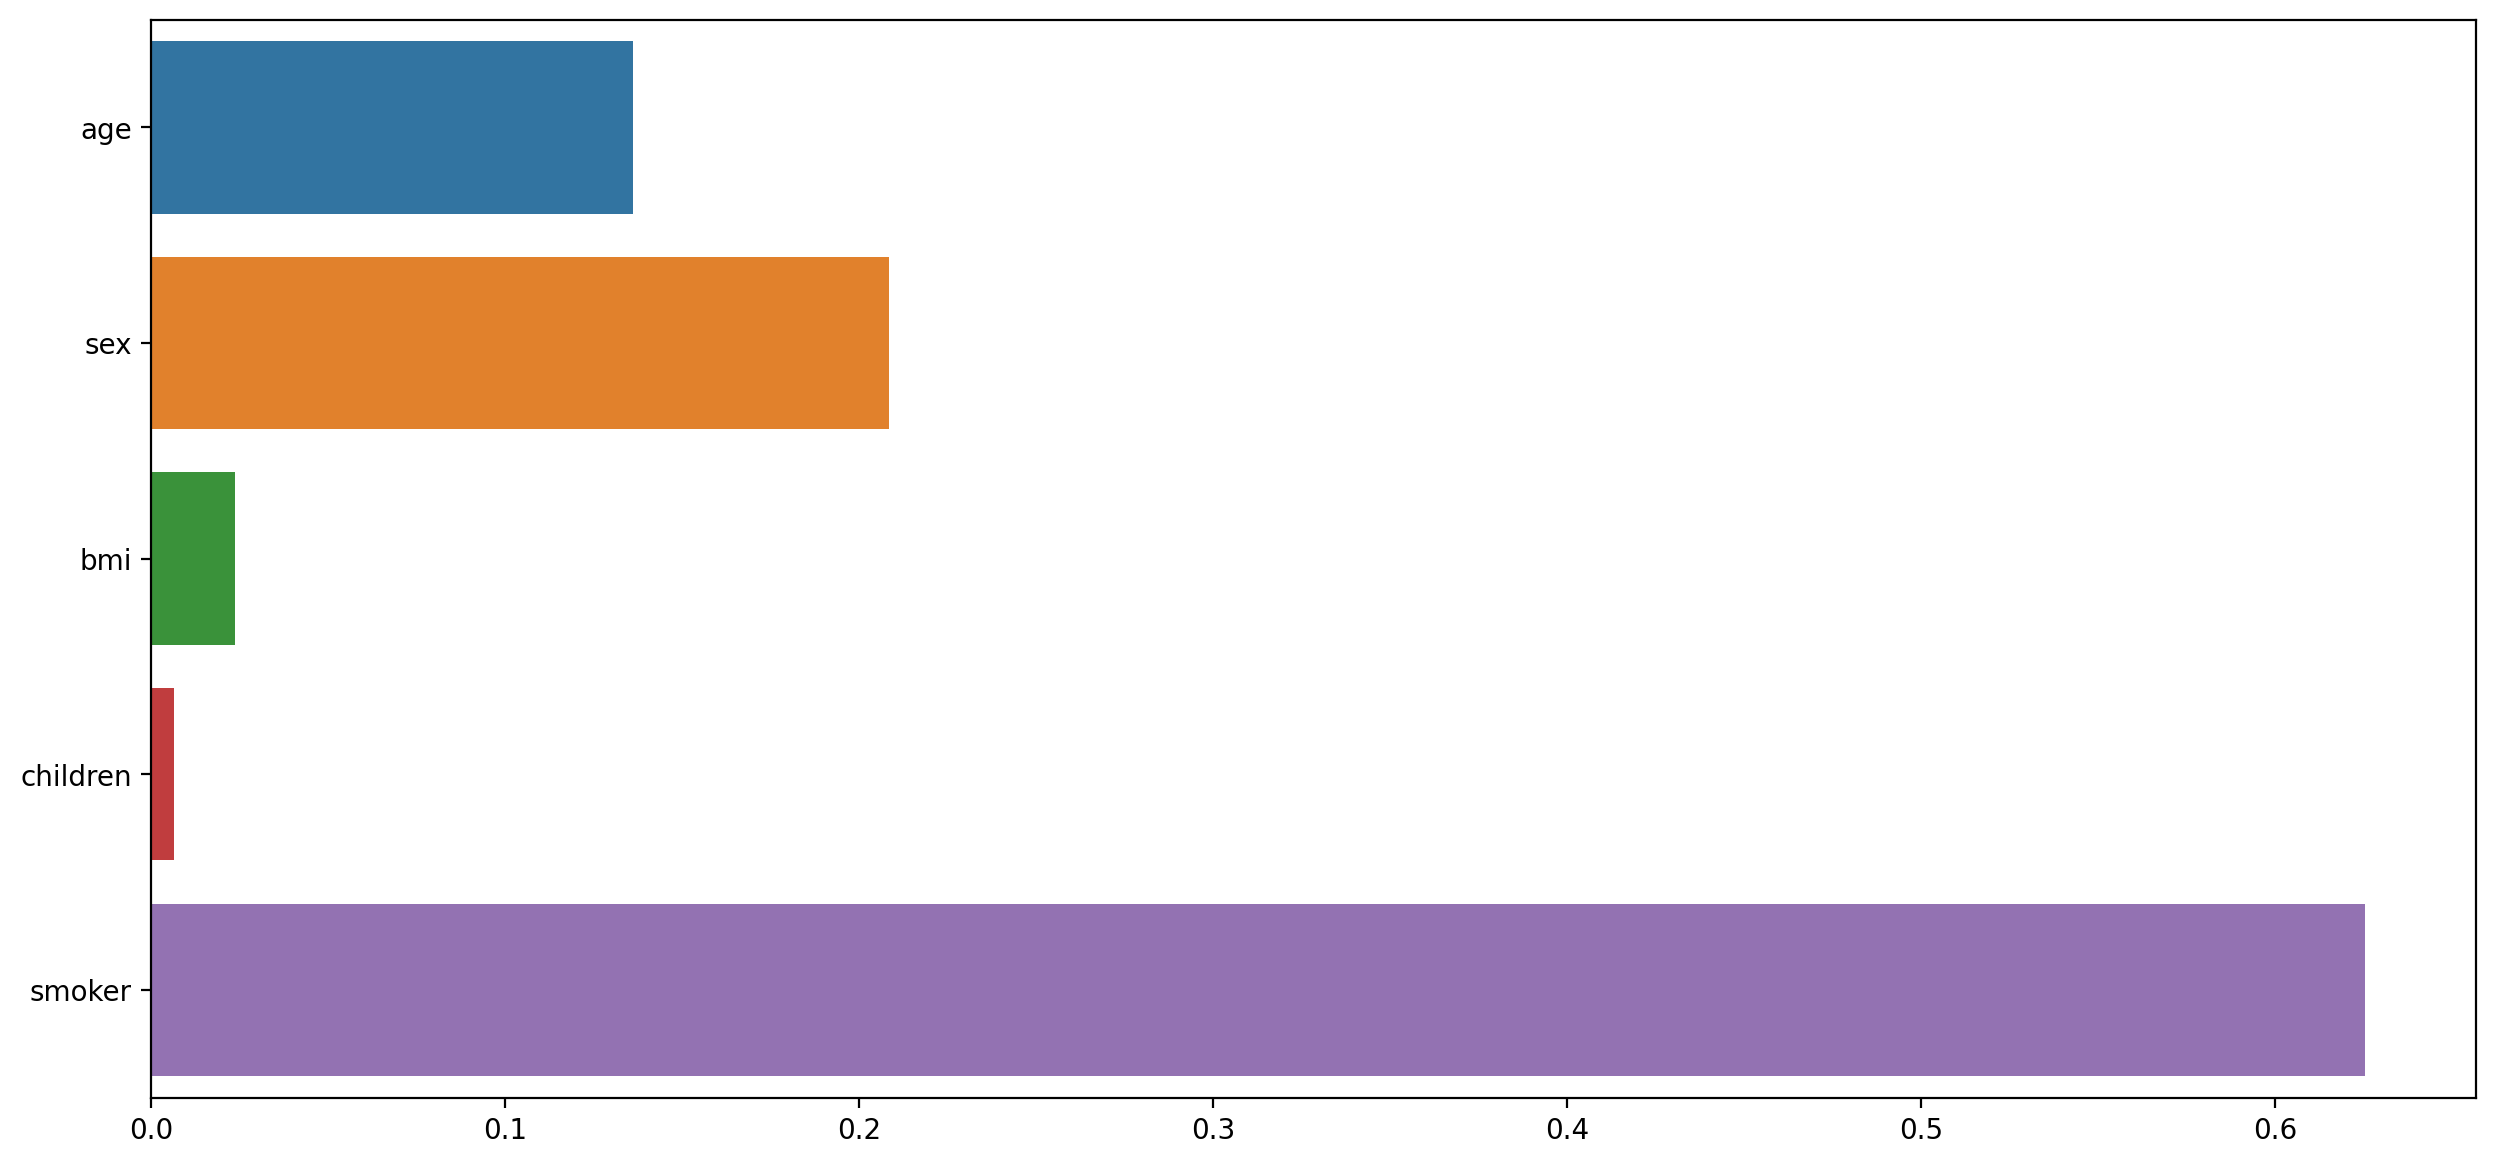

In [60]:
plt.figure(figsize=(15,7))
sns.barplot(x = regressor.feature_importances_, y = X_train.columns)
plt.show();

# Observations:
- Model Generated by `RandomForestRegressor`  is the best `Model` for Medical Cost Prediction problem.
- The Evaluation matric - Adjusted_r2_score of `RandomForest` is **`0.82`**.
- Using `feature_importances_` we came to know that features `bmi`,`children` are of least importance.
- This model is generated without removing the outliers.

## Performing Hyperparameter tuning using K-Fold Corss-Validation
#### Let's see if there will be any significance improvement

In [61]:
tuned_parameters = [{'max_depth' : [1,2,3,4,5,6,7,8,9]}]

regressor_RF = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid=tuned_parameters, 
    scoring='r2',
    cv=5,
    return_train_score=True,
    verbose=1
)
regressor_RF.fit(X_train_transform, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9]}],
             return_train_score=True, scoring='r2', verbose=1)

In [62]:
print("Best parameters set found on train set")
print(regressor_RF.best_params_)
print(regressor_RF.best_estimator_)
print()

print('Score on Test Data: ', regressor_RF.score(X_test_transform, y_test))

Best parameters set found on train set
{'max_depth': 4}
RandomForestRegressor(max_depth=4)

Score on Test Data:  0.8542850464797004


#### There is a 3-4 % significant improvement

#### The End